# Predicting House Prices using Machine Learning

In this notebook, we will be going through a machine learning project initiated by Kaggle, with the goal of predicting the sale price of houses.

Since we are trying to predict a number (sale price), this is a **regression problem**

## 1. Problem Definition

For this project, the question we are trying to answer is: 

> Given the characteristics of previous examples of similar houses that have been sold, how well can we predict the future sale price of a house?

## 2. Data

Looking at the dataset from Kaggle, there are 2 different datasets:
    1. train.csv - the training set
    2. test.csv - the test set

## 3. Evaluation

For this problem, Kaggle has set the evaluation metric to be Root Mean Squared Log Error (RMSLE). As with other regression evaluations, the goal is to get the RMSLE of our machine learning model to be as low as possible.

## 4. Features

Features are different parts of the data. During this step, you would want to start finding out what you can about the data.

One way to do this is to create a **data dictionary**.

For this dataset, Kaggle has provided a data dictionary that contains information about the different features of the data.
   
### Data Dictionary

Kaggle has also provided a data dictionary for us to refer to when viewing the features of the data. The following features will be used to predict our target variable (Sale Price of the house).

1. SalePrice - the property's sale price in dollars. This is the target variable that you're trying to predict.
2. MSSubClass: The building class
3. MSZoning: The general zoning classification
4. LotFrontage: Linear feet of street connected to property
5. LotArea: Lot size in square feet
6. Street: Type of road access
7. Alley: Type of alley access
8. LotShape: General shape of property
9. LandContour: Flatness of the property
10. Utilities: Type of utilities available
11. LotConfig: Lot configuration
12. LandSlope: Slope of property
13. Neighborhood: Physical locations within Ames city limits
14. Condition1: Proximity to main road or railroad
15. Condition2: Proximity to main road or railroad (if a second is present)
16. BldgType: Type of dwelling
17. HouseStyle: Style of dwelling
18. OverallQual: Overall material and finish quality
19. OverallCond: Overall condition rating
20. YearBuilt: Original construction date
21. YearRemodAdd: Remodel date
22. RoofStyle: Type of roof
23. RoofMatl: Roof material
24. Exterior1st: Exterior covering on house
25. Exterior2nd: Exterior covering on house (if more than one material)
26. MasVnrType: Masonry veneer type
27. MasVnrArea: Masonry veneer area in square feet
28. ExterQual: Exterior material quality
29. ExterCond: Present condition of the material on the exterior
30. Foundation: Type of foundation
31. BsmtQual: Height of the basement
32. BsmtCond: General condition of the basement
33. BsmtExposure: Walkout or garden level basement walls
34. BsmtFinType1: Quality of basement finished area
35. BsmtFinSF1: Type 1 finished square feet
36. BsmtFinType2: Quality of second finished area (if present)
37. BsmtFinSF2: Type 2 finished square feet
38. BsmtUnfSF: Unfinished square feet of basement area
39. TotalBsmtSF: Total square feet of basement area
40. Heating: Type of heating
41. HeatingQC: Heating quality and condition
42. CentralAir: Central air conditioning
43. Electrical: Electrical system
44. 1stFlrSF: First Floor square feet
45. 2ndFlrSF: Second floor square feet
46. LowQualFinSF: Low quality finished square feet (all floors)
47. GrLivArea: Above grade (ground) living area square feet
48. BsmtFullBath: Basement full bathrooms
49. BsmtHalfBath: Basement half bathrooms
50. FullBath: Full bathrooms above grade
51. HalfBath: Half baths above grade
52. Bedroom: Number of bedrooms above basement level
53. Kitchen: Number of kitchens
54. KitchenQual: Kitchen quality
55. TotRmsAbvGrd: Total rooms above grade (does not include bathrooms)
56. Functional: Home functionality rating
57. Fireplaces: Number of fireplaces
58. FireplaceQu: Fireplace quality
59. GarageType: Garage location
60. GarageYrBlt: Year garage was built
61. GarageFinish: Interior finish of the garage
62. GarageCars: Size of garage in car capacity
63. GarageArea: Size of garage in square feet
64. GarageQual: Garage quality
65. GarageCond: Garage condition
66. PavedDrive: Paved driveway
67. WoodDeckSF: Wood deck area in square feet
68. OpenPorchSF: Open porch area in square feet
69. EnclosedPorch: Enclosed porch area in square feet
70. 3SsnPorch: Three season porch area in square feet
71. ScreenPorch: Screen porch area in square feet
72. PoolArea: Pool area in square feet
73. PoolQC: Pool quality
74. Fence: Fence quality
75. MiscFeature: Miscellaneous feature not covered in other categories
76. MiscVal: Value of miscellaneous feature
77. MoSold: Month Sold
78. YrSold: Year Sold
79. SaleType: Type of sale
80. SaleCondition: Condition of sale

In [5]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings('ignore')

<frozen importlib._bootstrap>:219: RuntimeWarning: numpy.ufunc size changed, may indicate binary incompatibility. Expected 192 from C header, got 216 from PyObject
<frozen importlib._bootstrap>:219: RuntimeWarning: numpy.ufunc size changed, may indicate binary incompatibility. Expected 192 from C header, got 216 from PyObject


In [6]:
train = pd.read_csv('C:/Users/anglp/desktop/house_prices_project/data/train.csv')
test = pd.read_csv('C:/Users/anglp/desktop/house_prices_project/data/test.csv')
data = pd.concat([train, test], ignore_index=True, sort=False)
data.head(20)

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500.0
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500.0
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500.0
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000.0
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000.0
5,6,50,RL,85.0,14115,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,MnPrv,Shed,700,10,2009,WD,Normal,143000.0
6,7,20,RL,75.0,10084,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,8,2007,WD,Normal,307000.0
7,8,60,RL,NaN,10382,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,Shed,350,11,2009,WD,Normal,200000.0
8,9,50,RM,51.0,6120,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,4,2008,WD,Abnorml,129900.0
9,10,190,RL,50.0,7420,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,1,2008,WD,Normal,118000.0


In [7]:
data.tail(10)

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
2909,2910,180,RM,21.0,1470,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,4,2006,WD,Normal,NaN
2910,2911,160,RM,21.0,1484,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2006,WD,Normal,NaN
2911,2912,20,RL,80.0,13384,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2006,WD,Normal,NaN
2912,2913,160,RM,21.0,1533,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2006,WD,Abnorml,NaN
2913,2914,160,RM,21.0,1526,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,GdPrv,NaN,0,6,2006,WD,Normal,NaN
2914,2915,160,RM,21.0,1936,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,6,2006,WD,Normal,NaN
2915,2916,160,RM,21.0,1894,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,4,2006,WD,Abnorml,NaN
2916,2917,20,RL,160.0,20000,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2006,WD,Abnorml,NaN
2917,2918,85,RL,62.0,10441,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,MnPrv,Shed,700,7,2006,WD,Normal,NaN
2918,2919,60,RL,74.0,9627,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,11,2006,WD,Normal,NaN


In [8]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2919 entries, 0 to 2918
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             2919 non-null   int64  
 1   MSSubClass     2919 non-null   int64  
 2   MSZoning       2915 non-null   object 
 3   LotFrontage    2433 non-null   float64
 4   LotArea        2919 non-null   int64  
 5   Street         2919 non-null   object 
 6   Alley          198 non-null    object 
 7   LotShape       2919 non-null   object 
 8   LandContour    2919 non-null   object 
 9   Utilities      2917 non-null   object 
 10  LotConfig      2919 non-null   object 
 11  LandSlope      2919 non-null   object 
 12  Neighborhood   2919 non-null   object 
 13  Condition1     2919 non-null   object 
 14  Condition2     2919 non-null   object 
 15  BldgType       2919 non-null   object 
 16  HouseStyle     2919 non-null   object 
 17  OverallQual    2919 non-null   int64  
 18  OverallC

## Making a new copy of the original DataFrame

Since we will be manipulating the data, we will make a copy of the original dataframe and perform our changes there.

We will keep the original dataframe intact should we need it again.

In [9]:
df_temp = data.copy()

In [10]:
df_temp.drop('Id', axis=1, inplace=True)

In [11]:
df_temp.head(20).T

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19
MSSubClass,60,20,60,70,60,50,20,60,50,190,20,60,20,20,20,45,20,90,20,20
MSZoning,RL,RL,RL,RL,RL,RL,RL,RL,RM,RL,RL,RL,RL,RL,RL,RM,RL,RL,RL,RL
LotFrontage,65,80,68,60,84,85,75,NaN,51,50,70,85,NaN,91,NaN,51,NaN,72,66,70
LotArea,8450,9600,11250,9550,14260,14115,10084,10382,6120,7420,11200,11924,12968,10652,10920,6120,11241,10791,13695,7560
Street,Pave,Pave,Pave,Pave,Pave,Pave,Pave,Pave,Pave,Pave,Pave,Pave,Pave,Pave,Pave,Pave,Pave,Pave,Pave,Pave
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
MoSold,2,5,9,2,12,10,8,11,4,1,2,7,9,8,5,7,3,10,6,5
YrSold,2008,2007,2008,2006,2008,2009,2007,2009,2008,2008,2008,2006,2008,2007,2008,2007,2010,2006,2008,2009
SaleType,WD,WD,WD,WD,WD,WD,WD,WD,WD,WD,WD,New,WD,New,WD,WD,WD,WD,WD,COD
SaleCondition,Normal,Normal,Normal,Abnorml,Normal,Normal,Normal,Normal,Abnorml,Normal,Normal,Partial,Normal,Partial,Normal,Normal,Normal,Normal,Normal,Abnorml


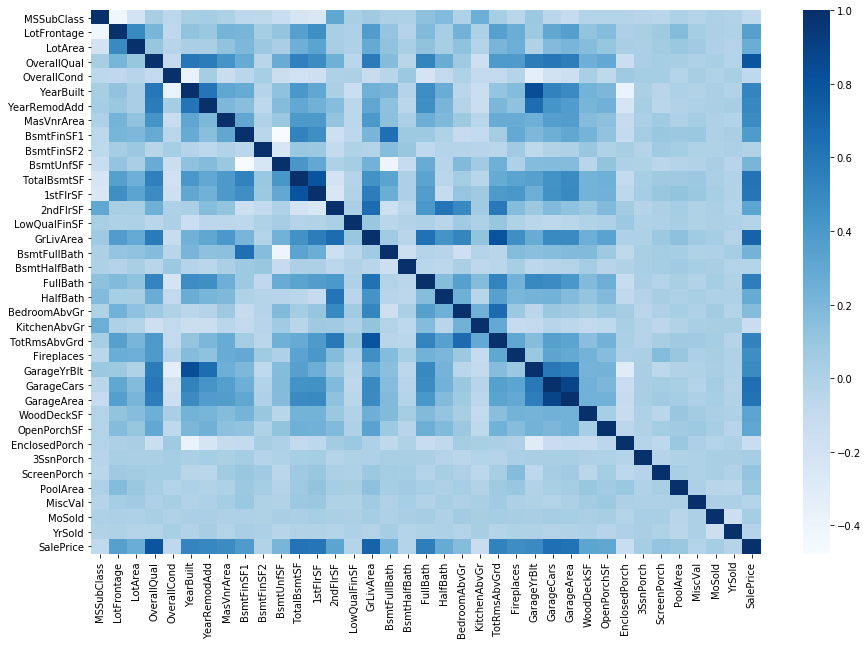

In [12]:
# Checking the correlation of all the features against each other
df_corr = df_temp.corr()
plt.figure(figsize=(15,10))
sns.heatmap(df_corr, cmap='Blues')
plt.show()

In [13]:
# Finding and sorting the features that have at least 0.5 correlation value to SalePrice
df_corr[abs(df_corr['SalePrice'].values) >= 0.5]['SalePrice'].sort_values(ascending=False)[1:]

OverallQual     0.790982
GrLivArea       0.708624
GarageCars      0.640409
GarageArea      0.623431
TotalBsmtSF     0.613581
1stFlrSF        0.605852
FullBath        0.560664
TotRmsAbvGrd    0.533723
YearBuilt       0.522897
YearRemodAdd    0.507101
Name: SalePrice, dtype: float64

In [14]:
df_temp['OverallQual'].value_counts()

5     825
6     731
7     600
8     342
4     226
9     107
3      40
10     31
2      13
1       4
Name: OverallQual, dtype: int64

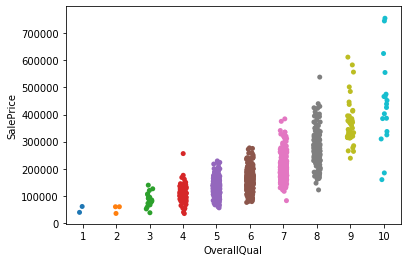

In [15]:
# Seeing the relationship between OverallQual and SalePrice.
sns.stripplot(df_temp['OverallQual'], df_temp['SalePrice'], size=5);

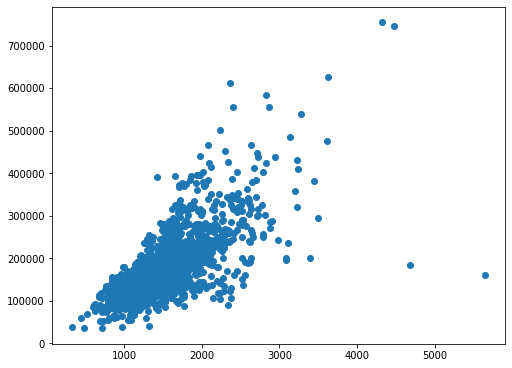

In [16]:
# Seeing the relationship between GrLivArea and SalePrice
fig, ax = plt.subplots(figsize=(7,5), constrained_layout=True)
ax.scatter(df_temp['GrLivArea'], df_temp['SalePrice']);

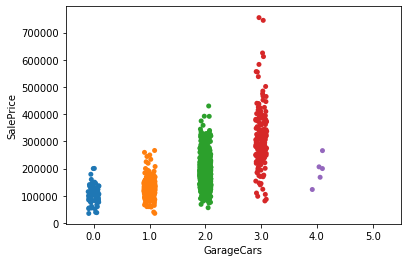

In [17]:
# Seeing the relationship between GarageCars and SalePrice
sns.stripplot(df_temp['GarageCars'], df_temp['SalePrice']);

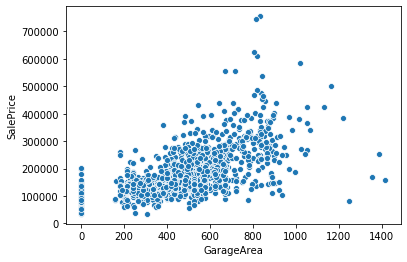

In [18]:
# Seeing the relationship between GarageArea and SalePrice
sns.scatterplot(df_temp['GarageArea'], df_temp['SalePrice']);

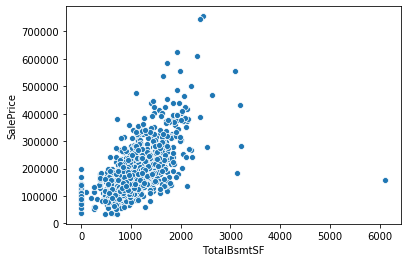

In [19]:
# Seeing the relationship between TotalBsmtSF and SalePrice
sns.scatterplot(df_temp['TotalBsmtSF'], df_temp['SalePrice']);

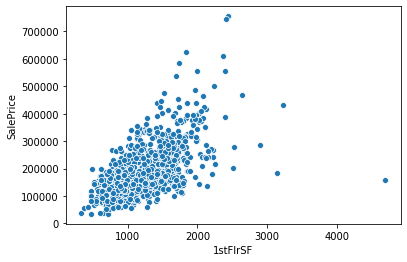

In [20]:
# Seeing the relationship between 1stFlrSF and SalePrice
sns.scatterplot(df_temp['1stFlrSF'], df_temp['SalePrice']);

## Resetting the data

Since we have made changes to the original data while doing our EDA (Exploratory Data Analysis), we need to change back to the original data to carry on with feature engineering.

In [21]:
df_temp.reset_index(drop=True)
df_temp

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,Inside,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500.0
1,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,FR2,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500.0
2,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,Inside,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500.0
3,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,Corner,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000.0
4,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,FR2,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2914,160,RM,21.0,1936,Pave,NaN,Reg,Lvl,AllPub,Inside,...,0,NaN,NaN,NaN,0,6,2006,WD,Normal,NaN
2915,160,RM,21.0,1894,Pave,NaN,Reg,Lvl,AllPub,Inside,...,0,NaN,NaN,NaN,0,4,2006,WD,Abnorml,NaN
2916,20,RL,160.0,20000,Pave,NaN,Reg,Lvl,AllPub,Inside,...,0,NaN,NaN,NaN,0,9,2006,WD,Abnorml,NaN
2917,85,RL,62.0,10441,Pave,NaN,Reg,Lvl,AllPub,Inside,...,0,NaN,MnPrv,Shed,700,7,2006,WD,Normal,NaN


## Checking and filling for missing data

In [22]:
# Checking which features of the data are missing data
for feature, data in df_temp.items():
    if pd.isnull(data).sum():
        print(feature)

MSZoning
LotFrontage
Alley
Utilities
Exterior1st
Exterior2nd
MasVnrType
MasVnrArea
BsmtQual
BsmtCond
BsmtExposure
BsmtFinType1
BsmtFinSF1
BsmtFinType2
BsmtFinSF2
BsmtUnfSF
TotalBsmtSF
Electrical
BsmtFullBath
BsmtHalfBath
KitchenQual
Functional
FireplaceQu
GarageType
GarageYrBlt
GarageFinish
GarageCars
GarageArea
GarageQual
GarageCond
PoolQC
Fence
MiscFeature
SaleType
SalePrice


In [23]:
# Making a DataFrame of the total number of missing data and the percentages
missing_total = df_temp.isna().sum().sort_values(ascending=False)
missing_percent = ((df_temp.isna().sum() / 2919) * 100).sort_values(ascending=False)
missing_data = pd.concat([missing_total, missing_percent], axis=1, keys=['Total Number of Missing Samples', 'Percentage of Missing Samples'])
missing_data.head(40)

,Total Number of Missing Samples,Percentage of Missing Samples
PoolQC,2909,99.657417
MiscFeature,2814,96.402878
Alley,2721,93.216855
Fence,2348,80.438506
SalePrice,1459,49.982871
FireplaceQu,1420,48.646797
LotFrontage,486,16.649538
GarageCond,159,5.447071
GarageYrBlt,159,5.447071
GarageQual,159,5.447071


In [24]:
df_temp.isna().count()

MSSubClass       2919
MSZoning         2919
LotFrontage      2919
LotArea          2919
Street           2919
                 ... 
MoSold           2919
YrSold           2919
SaleType         2919
SaleCondition    2919
SalePrice        2919
Length: 80, dtype: int64

In [25]:
df_temp.drop('SalePrice', axis=1, inplace=True)

In [26]:
# Checking for features with missins string data
for feature, data in df_temp.items():
    if pd.api.types.is_string_dtype(data):
        print(feature)

MSZoning
Street
Alley
LotShape
LandContour
Utilities
LotConfig
LandSlope
Neighborhood
Condition1
Condition2
BldgType
HouseStyle
RoofStyle
RoofMatl
Exterior1st
Exterior2nd
MasVnrType
ExterQual
ExterCond
Foundation
BsmtQual
BsmtCond
BsmtExposure
BsmtFinType1
BsmtFinType2
Heating
HeatingQC
CentralAir
Electrical
KitchenQual
Functional
FireplaceQu
GarageType
GarageFinish
GarageQual
GarageCond
PavedDrive
PoolQC
Fence
MiscFeature
SaleType
SaleCondition


In [27]:
# Changing all the features with string values to categories
for feature, data in df_temp.items():
    if pd.api.types.is_string_dtype(data):
        df_temp[feature] = data.astype('category').cat.as_ordered()

In [28]:
for feature, data in df_temp.items():
    if pd.api.types.is_string_dtype(data):
        if pd.isna(data).sum()>0:
           #df_temp[feature+'_is_missing'] = pd.isna(data)
            # +1 because pandas encodes NaN categories as -1
            df_temp[feature] = pd.Categorical(data).codes + 1

In [29]:
# Checking which data is not of string value type, i.e int and float
for feature, data in df_temp.items():
    if not pd.api.types.is_string_dtype(data):
        if pd.isna(data).sum()>0:
            print(feature)

LotFrontage
MasVnrArea
BsmtFinSF1
BsmtFinSF2
BsmtUnfSF
TotalBsmtSF
BsmtFullBath
BsmtHalfBath
GarageYrBlt
GarageCars
GarageArea


In [30]:
# Filling the missing numerical values with the median of the column
for feature, data in df_temp.items():
    if pd.api.types.is_numeric_dtype(data):
        if pd.isna(data).sum()>0:
#            df_temp[feature+'_is_missing'] = pd.isna(data)
            df_temp[feature] = data.fillna(data.median())

In [31]:
pd.options.display.max_rows = 113
df_temp.isna().sum()

MSSubClass       0
MSZoning         0
LotFrontage      0
LotArea          0
Street           0
Alley            0
LotShape         0
LandContour      0
Utilities        0
LotConfig        0
LandSlope        0
Neighborhood     0
Condition1       0
Condition2       0
BldgType         0
HouseStyle       0
OverallQual      0
OverallCond      0
YearBuilt        0
YearRemodAdd     0
RoofStyle        0
RoofMatl         0
Exterior1st      0
Exterior2nd      0
MasVnrType       0
MasVnrArea       0
ExterQual        0
ExterCond        0
Foundation       0
BsmtQual         0
BsmtCond         0
BsmtExposure     0
BsmtFinType1     0
BsmtFinSF1       0
BsmtFinType2     0
BsmtFinSF2       0
BsmtUnfSF        0
TotalBsmtSF      0
Heating          0
HeatingQC        0
CentralAir       0
Electrical       0
1stFlrSF         0
2ndFlrSF         0
LowQualFinSF     0
GrLivArea        0
BsmtFullBath     0
BsmtHalfBath     0
FullBath         0
HalfBath         0
BedroomAbvGr     0
KitchenAbvGr     0
KitchenQual 

## Splitting the data back into train and test sets

In [32]:
final_features = pd.get_dummies(df_temp).reset_index(drop=True)
final_features

,MSSubClass,MSZoning,LotFrontage,LotArea,Alley,Utilities,OverallQual,OverallCond,YearBuilt,YearRemodAdd,...,CentralAir_Y,PavedDrive_N,PavedDrive_P,PavedDrive_Y,SaleCondition_Abnorml,SaleCondition_AdjLand,SaleCondition_Alloca,SaleCondition_Family,SaleCondition_Normal,SaleCondition_Partial
0,60,4,65.0,8450,0,1,7,5,2003,2003,...,1,0,0,1,0,0,0,0,1,0
1,20,4,80.0,9600,0,1,6,8,1976,1976,...,1,0,0,1,0,0,0,0,1,0
2,60,4,68.0,11250,0,1,7,5,2001,2002,...,1,0,0,1,0,0,0,0,1,0
3,70,4,60.0,9550,0,1,7,5,1915,1970,...,1,0,0,1,1,0,0,0,0,0
4,60,4,84.0,14260,0,1,8,5,2000,2000,...,1,0,0,1,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2914,160,5,21.0,1936,0,1,4,7,1970,1970,...,1,0,0,1,0,0,0,0,1,0
2915,160,5,21.0,1894,0,1,4,5,1970,1970,...,1,0,0,1,1,0,0,0,0,0
2916,20,4,160.0,20000,0,1,5,7,1960,1996,...,1,0,0,1,1,0,0,0,0,0
2917,85,4,62.0,10441,0,1,5,5,1992,1992,...,1,0,0,1,0,0,0,0,1,0


In [33]:
train.shape

(1460, 81)

In [34]:
row_num = train.shape[0]

X_trainval = final_features[:row_num]
X_test = final_features[row_num:]
y_trainval = train['SalePrice']

In [35]:
np.random.seed(50)

from sklearn.model_selection import train_test_split
X_train, X_val, y_train, y_val = train_test_split(X_trainval, y_trainval, test_size=0.2)

In [36]:
X_train.shape, X_val.shape, y_train.shape, y_val.shape, X_test.shape

((1168, 183), (292, 183), (1168,), (292,), (1459, 183))

## Building an evaluation function

In [37]:
from sklearn.metrics import mean_absolute_error, mean_squared_log_error

def rmsle(y_test, y_preds):
    return np.sqrt(mean_squared_log_error(y_test, y_preds))

def show_scores(model):
    train_preds = model.predict(X_train)
    val_preds = model.predict(X_val)
    scores = {'Training R^2': model.score(X_train, y_train),
              'Valid R^2': model.score(X_val, y_val),
              'Training MAE': mean_absolute_error(y_train, train_preds),
              'Valid MAE': mean_absolute_error(y_val, val_preds),
              'Training RMSLE': rmsle(y_train, train_preds),
              'Valid RMSLE': rmsle(y_val, val_preds)}
    return scores

## Building a machine learning model

In [38]:
np.random.seed(50)
from sklearn.ensemble import RandomForestRegressor

model = RandomForestRegressor()
model.fit(X_train, y_train)
show_scores(model)

{'Training R^2': 0.9800299459841715,
 'Valid R^2': 0.8924680753074948,
 'Training MAE': 6736.071960616439,
 'Valid MAE': 17069.073630136987,
 'Training RMSLE': 0.05859029494497725,
 'Valid RMSLE': 0.14808597218630362}

In [39]:
# Using RandomizedSearchCV to find the best randomized model
from sklearn.model_selection import RandomizedSearchCV, GridSearchCV

rs_grid = {'n_estimators': np.arange(50,200,10),
           'max_depth': [None, 4,6,8,10],
           'min_samples_split': np.arange(2,20,2),
           'min_samples_leaf': np.arange(1,40,2),
           'max_features': ['auto', 'sqrt', 'log2'],
           'min_impurity_decrease': np.linspace(1,50,7),
           'min_impurity_split': np.linspace(1,50,7)}

rs_model = RandomizedSearchCV(RandomForestRegressor(),
                              param_distributions=rs_grid, 
                              cv=5,
                              verbose=True,
                              n_iter=200,
                              n_jobs=-1)

rs_model.fit(X_train, y_train)

Fitting 5 folds for each of 200 candidates, totalling 1000 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  42 tasks      | elapsed:   10.2s
[Parallel(n_jobs=-1)]: Done 192 tasks      | elapsed:   41.2s
[Parallel(n_jobs=-1)]: Done 442 tasks      | elapsed:  1.4min
[Parallel(n_jobs=-1)]: Done 792 tasks      | elapsed:  3.0min
[Parallel(n_jobs=-1)]: Done 1000 out of 1000 | elapsed:  3.9min finished


RandomizedSearchCV(cv=5, error_score=nan,
                   estimator=RandomForestRegressor(bootstrap=True,
                                                   ccp_alpha=0.0,
                                                   criterion='mse',
                                                   max_depth=None,
                                                   max_features='auto',
                                                   max_leaf_nodes=None,
                                                   max_samples=None,
                                                   min_impurity_decrease=0.0,
                                                   min_impurity_split=None,
                                                   min_samples_leaf=1,
                                                   min_samples_split=2,
                                                   min_weight_fraction_leaf=0.0,
                                                   n_estimators=100,
                              

In [40]:
show_scores(rs_model)

{'Training R^2': 0.9450083687464488,
 'Valid R^2': 0.8870199376806643,
 'Training MAE': 11162.821958229895,
 'Valid MAE': 17736.154421946285,
 'Training RMSLE': 0.09795334087672429,
 'Valid RMSLE': 0.15502991014684073}

In [41]:
rs_model.best_params_

{'n_estimators': 80,
 'min_samples_split': 6,
 'min_samples_leaf': 3,
 'min_impurity_split': 50.0,
 'min_impurity_decrease': 9.166666666666666,
 'max_features': 'auto',
 'max_depth': 8}

In [52]:
# Using GridSearchCV to exhaustively find the best model
s_grid = {'n_estimators': np.arange(120,200,10),
           'max_depth': [None, 2, 4],
           'min_samples_split': np.arange(5,16,3),
           'min_samples_leaf': np.arange(1,50,10),
           'max_features': ['auto', 'sqrt', 'log2'],
           'min_impurity_decrease': np.arange(0,60,20),
           'min_impurity_split': np.arange(20,50,10)}

gs_model = GridSearchCV(RandomForestRegressor(),
                        param_grid=gs_grid,
                        cv=5,
                        verbose=True,
                        n_jobs=-1)

gs_model.fit(X_train, y_train)

Fitting 5 folds for each of 12960 candidates, totalling 64800 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  42 tasks      | elapsed:   44.9s
[Parallel(n_jobs=-1)]: Done 192 tasks      | elapsed:  2.8min
[Parallel(n_jobs=-1)]: Done 442 tasks      | elapsed:  4.8min
[Parallel(n_jobs=-1)]: Done 792 tasks      | elapsed:  7.0min
[Parallel(n_jobs=-1)]: Done 1242 tasks      | elapsed: 11.8min
[Parallel(n_jobs=-1)]: Done 1792 tasks      | elapsed: 16.8min
[Parallel(n_jobs=-1)]: Done 2442 tasks      | elapsed: 21.7min
[Parallel(n_jobs=-1)]: Done 3192 tasks      | elapsed: 28.8min
[Parallel(n_jobs=-1)]: Done 4042 tasks      | elapsed: 36.9min
[Parallel(n_jobs=-1)]: Done 4992 tasks      | elapsed: 48.3min
[Parallel(n_jobs=-1)]: Done 6042 tasks      | elapsed: 57.8min
[Parallel(n_jobs=-1)]: Done 7192 tasks      | elapsed: 67.0min
[Parallel(n_jobs=-1)]: Done 8442 tasks      | elapsed: 70.5min
[Parallel(n_jobs=-1)]: Done 9792 tasks      | elapsed: 74.3min
[Parallel(n_jobs=-1)]: Done 11242 tasks      |

GridSearchCV(cv=5, error_score=nan,
             estimator=RandomForestRegressor(bootstrap=True, ccp_alpha=0.0,
                                             criterion='mse', max_depth=None,
                                             max_features='auto',
                                             max_leaf_nodes=None,
                                             max_samples=None,
                                             min_impurity_decrease=0.0,
                                             min_impurity_split=None,
                                             min_samples_leaf=1,
                                             min_samples_split=2,
                                             min_weight_fraction_leaf=0.0,
                                             n_estimators=100, n_jobs=None,
                                             oob_score=False, rand...
             param_grid={'max_depth': [None, 2, 4],
                         'max_features': ['auto', 'sqrt', 'log2'],
  

In [108]:
gs_model.best_params_

{'max_depth': 4,
 'max_features': 'auto',
 'min_impurity_decrease': 0,
 'min_impurity_split': 40,
 'min_samples_leaf': 21,
 'min_samples_split': 8,
 'n_estimators': 160}

In [43]:
ideal_model = RandomForestRegressor(max_depth = 4,
                                    max_features = 'auto',
                                    min_impurity_decrease = 0,
                                    min_impurity_split = 40,
                                    min_samples_leaf = 21,
                                    min_samples_split = 8,
                                    n_estimators = 160)

In [44]:
ideal_model.fit(X_train, y_train)

RandomForestRegressor(bootstrap=True, ccp_alpha=0.0, criterion='mse',
                      max_depth=4, max_features='auto', max_leaf_nodes=None,
                      max_samples=None, min_impurity_decrease=0,
                      min_impurity_split=40, min_samples_leaf=21,
                      min_samples_split=8, min_weight_fraction_leaf=0.0,
                      n_estimators=160, n_jobs=None, oob_score=False,
                      random_state=None, verbose=0, warm_start=False)

In [45]:
show_scores(ideal_model)

{'Training R^2': 0.8086238963946364,
 'Valid R^2': 0.8400414150727837,
 'Training MAE': 21493.40539635639,
 'Valid MAE': 22506.770452293298,
 'Training RMSLE': 0.17536400100160296,
 'Valid RMSLE': 0.1959953339964671}

In [50]:
# But i realised that my original model had a better score than the GS model
show_scores(model)

{'Training R^2': 0.9800299459841715,
 'Valid R^2': 0.8924680753074948,
 'Training MAE': 6736.071960616439,
 'Valid MAE': 17069.073630136987,
 'Training RMSLE': 0.05859029494497725,
 'Valid RMSLE': 0.14808597218630362}

In [56]:
test_preds = ideal_model.predict(X_test)

In [57]:
output = pd.DataFrame({'Id': range(1461,2920), 'SalePrice': test_preds})

In [58]:
output.to_csv('my_submission.csv', index=False)

In [59]:
output

,Id,SalePrice
0,1461,125874.559310
1,1462,142831.470983
2,1463,182748.500920
3,1464,180396.489515
4,1465,220971.584934
...,...,...
1454,2915,108175.909053
1455,2916,109176.730349
1456,2917,146774.091417
1457,2918,127639.386419


In [60]:
# Using the original model instead
new_test_preds = model.predict(X_test)

In [61]:
new_output = pd.DataFrame({'Id': range(1461,2920), 'SalePrice': new_test_preds})

In [64]:
new_output.to_csv('my_submission.csv', index=False)

In [65]:
new_output

,Id,SalePrice
0,1461,122946.41
1,1462,156575.35
2,1463,192932.06
3,1464,185461.00
4,1465,207429.92
...,...,...
1454,2915,85774.00
1455,2916,86204.00
1456,2917,156688.74
1457,2918,125138.75
